# <span style="color:blue">Esercitazione 9</span>

### Esercizio 09.1

In questo esercizio cerco di risolvere il problema del commesso viaggiatore (*Traveling Salesman Problem*, TSP), attraverso l'uso dell'algortimo genetico (GA) implementato nella libreria <font face="Courier">GeneticTSP</font>. Mi sono concentrato sui casi di $N=32$ disposte casualmente nel piano rispettivamente all'interno di un quadrato $2\times2$ e su una circonferenza di raggio $2$, ma poi ho anche provato ad estendere la trattazione al problema analogo con $N=100$, significativamente più complesso (per questo si veda l'appendice).

In entrambi i casi la funzione costo studiata è
$$ L(\vec{x}_0, \vec{x}_1, \dots, \vec{x}_{N-1}) = \sum_{i=0}^{N-1} |\vec{x}_i-\vec{x}_{i+1}| $$
dove $\vec{x}_0, \dots, \vec{x}_{N-1}$ rappresenta una particolare permutazione delle $N$ città considerate $c_0,\dots,c_{N-1}$ e dove per convenzione $\vec{x}_N=\vec{x}_0$. I possibili cammini sono stati rappresentati come vettori 1D di interi rappresentanti in ordine gli indici delle città visitate. La città di partenza è stata fissata in $c_0$, in modo da ridurre l'eccessiva degenerazione delle soluzioni.

In generale un algoritmo genetico si basa sulla definizione di una popolazione di $N_{chr}$ cromosomi, o individui, e sulla sua evoluzione nel corso delle $N_{gen}$ considerate nella simulazioni. Se si definiscono in modo opportuno l'operatore di *selezione* ed uno (o più) operatori di *mutazione* e di *crossing over* si può riuscire a trovare il minimo (possibilmente globale) della funzione costo analizzata. Il primo degli operatori citati agisce in maniera da concentrare la ricerca nelle regioni dello spazio delle soluzioni che via via sembrano portare verso il minimo della distanza percorsa, mentre le mutazioni servono per introdurre variazioni casuali nei cammini di una popolazione e per esplorare quindi in maniera il più possibile efficace una regione quanto più vasta dello spazio delle possibili soluzioni. L'operatore di *crossing over* è utile infine per migliorare le possibilità di convergenza e la rapidità dell'algoritmo (in analogia con i casi biologici possiamo descrivere quello come l'algoritmo che permette il rimescolamento genetico tra gli individui di una popolazione nel corso delle generazioni).

Il funzionamento generale del codice che ho implementato è il seguente:
1. Generazione casuale delle posizioni delle città: per ogni città estraggo uniformemente nel caso 'square' (città all'interno del quadrato) le relative ascissa e ordinata in $[-1,1]$, nel caso 'circ' (città sulla circonferenza) un angolo tra $0$ e $2\pi$, che individua in maniera diretta la posizione della città; in questo processo l'ordine di generazione delle città è anche lo stesso con cui vengono nominate ($c_0$ è la prima città che è stata generata, $c_2$ la seconda, ..., $c_{N-1}$ l'ultima)
2. Generazione della popolazione iniziale: ognuno degli $N_{chr}$ cromosomi è composto da $N$ geni, definiti inizialmente coi valori $[0,\dots,N-1]$ e inizializzati subito scambiando progressivamente ognuno dei singoli geni con un altro estratto casualmente tra tutti quelli che compongono il cromosoma
3. Evoluzione: per produrre una singola nuova generazione vengono riprodotti $N_{chr}/2$ volte i seguenti passaggi:
    1. Selezione di due cromosomi padri tra tutti quelli della generazione attuale (si veda il seguito per una descrizione più dettagliata)
    2. Con un operazione di crossover dai due padri vengono generati altrettanti figli
    3. Possibile mutazione dei figli; in questa fase per ognuno dei due cromosomi ogni operatore di mutazione implementato (si veda il seguito) ha una specifica probabilità di essere effettivamente applicato; le mutazioni vengono provate in serie nell'ordine in cui sono descritte più sotto
    4. Salvataggio dei nuovi cromosomi prodotti nella generazione successiva (se $N_{chr}$ è dispari i passaggi vengono ripetuti $(N_{chr}+1)/2$ volte, e l'ultimo figlio non viene salvato)
4. ***Ordinamento della nuova generazione***

Ogni volta che un cromosoma viene modificato viene chiamata la funzione <font face="Courier">Check()</font>, che controlla che il nuovo cammino ottenuto sia ancora una permutazione della sequenza $[0,\dots,N-1]$ che inizia con $0$.\
Il programma termina la simulazione solo se, una volta trovato il percorso in assoluto migliore tra tutti quelli visitati in tutta l'evoluzione della popolazione, passano altre $N_{max}=1000$ generazioni senza ulteriori miglioramenti.

**DESCRIZIONE SINGOLI OPERATORI, SELEZIONE, MUTAZIONE E CROSSING OVER**\
*--roba vecchia:--\
Nella libreria <font face="Courier">TSPpath</font> ho implementato quattro differenti operatori di mutazione. Li descrivo qui sotto riportandone anche la probabilità che ad ogni 
Gli operatori sono i seguenti; ne riporto anche le probabilità di utilizzo effettivo\
In generale un codice genetico si basa sulle operazioni di *mutazione*, che permette di introdurre variazioni casual*

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl

In [2]:
loc=('square','circ'); ncit=('32','100')
dist=[0,0]; path=[0,0]   #1st is square, 2nd circ
prog=[0,0]               #progressive total length evolution

theta=np.linspace(0,2.*3.141593,num=200)    #for circ graphs
sinn=np.sin(theta); coss=np.cos(theta)
title=('Square','Circumference')

In [3]:
def path_fig(ifstart):
    pl.figure(figsize=(9,4))
    for i in range(2):
        pl.subplot(1,2,i+1)
        if i==1: pl.plot(coss,sinn,color='k',linewidth=0.4)
        pl.plot(path[i]['x'],path[i]['y'],marker='*',linewidth=1)
        pl.plot(path[i]['x'][0],path[i]['y'][0],marker='*',color='r')
        pl.xlabel('$x$')
        if i==0: pl.ylabel('$y$',labelpad=15)
        pl.xlim(-1.05,1.05)
        pl.ylim(-1.05,1.05)
        pl.title(title[i])
    if ifstart: tit="Starting"
    else: tit="Final"
    pl.suptitle(tit+" 1-st chromosome's path",y=1.02)
    pl.show()
    
    print(tit+' total distance:')
    for i in range(2): print('  '+loc[i]+': \t', dist[i])

Qui sotto riporto la situazione di partenza. Il cammino tracciato è il più breve tra tutti quelli estratti per costruire i cromosomi della generazione di partenza.

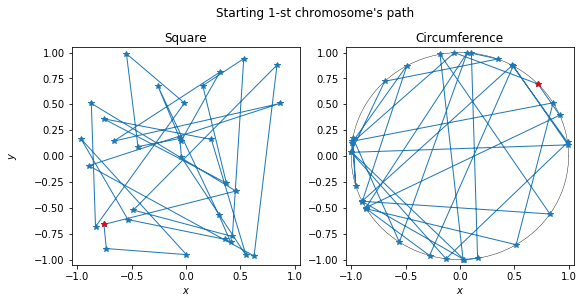

Starting total distance:
  square: 	 33.7649
  circ: 	 40.8131


In [4]:
for i in range(2):
    dist[i]=np.genfromtxt('results/cities.'+loc[i]+'.32.start',max_rows=1)
    path[i]=np.genfromtxt('results/cities.'+loc[i]+'.32.start',skip_header=1,names='x,y')

path_fig(True)

In [5]:
best=[0,0]; index=[0,0]
def evolution(ylim):
    pl.figure(figsize=(15,5))
    for i in range(2):
        pl.subplot(1,2,i+1)
        pl.plot(prog[i]['gen'],prog[i]['mean'],marker='.',linestyle='',label='1st half')
        pl.plot(prog[i]['gen'],prog[i]['best'],marker='.',linestyle='',label='best')
        best[i]=min(prog[i]['best']); index[i]=np.argmin(prog[i]['best'])
        pl.axhline(y=best[i],color='k',linestyle='dashed',linewidth=0.8)
        pl.legend(loc='best')
        pl.grid(True)
        pl.ylim(ylim[i])
        pl.xlabel('$N_{gen}$')
        pl.ylabel("path's lenght",labelpad=15)
        pl.title(title[i])
    pl.suptitle("Progression of best path's and 1st half paths' lenghts")
    pl.show()
    
    print('best total distance:')
    for i in range(2): print('  '+loc[i]+': \t',best[i],'  with',index[i],'generations')

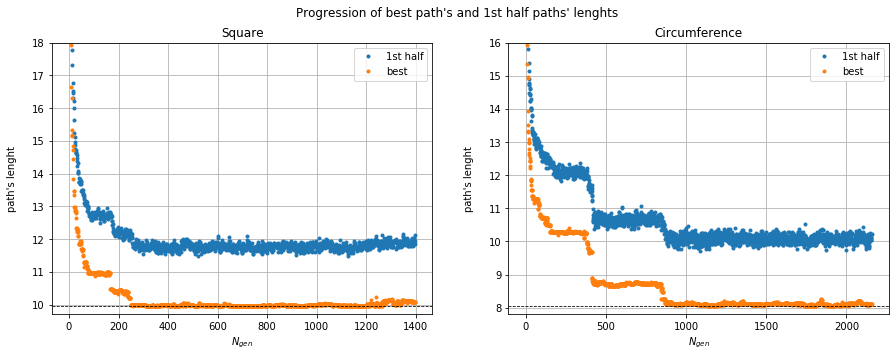

best total distance:
  square: 	 9.94326   with 380 generations
  circ: 	 8.04503   with 1140 generations


In [6]:
for i in range(2): prog[i]=np.genfromtxt('results/path.'+loc[i]+'.32.base.lenght',names='gen,best,mean')

evolution(((9.7,18),(7.8,16)))

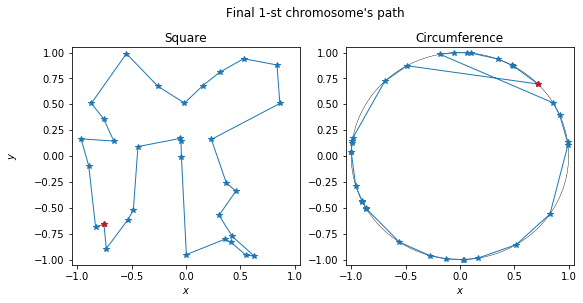

Final total distance:
  square: 	 9.94326
  circ: 	 8.04503


In [7]:
for i in range(2):
    dist[i]=np.genfromtxt('results/path.'+loc[i]+'.32.base.best',max_rows=1)
    path[i]=np.genfromtxt('results/path.'+loc[i]+'.32.base.best',skip_header=1,names='x,y')

path_fig(False)

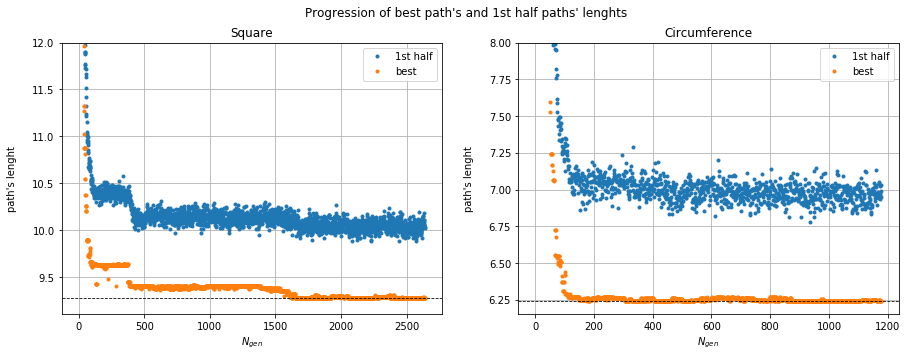

best total distance:
  square: 	 9.27331   with 1622 generations
  circ: 	 6.2403   with 174 generations


In [8]:
for i in range(2): prog[i]=np.genfromtxt('results/path.'+loc[i]+'.32.mut.lenght',names='gen,best,mean')

evolution(((9.1,12),(6.15,8)))

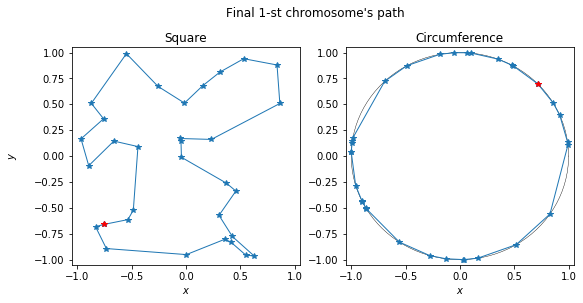

Final total distance:
  square: 	 9.27331
  circ: 	 6.2403


In [9]:
for i in range(2):
    dist[i]=np.genfromtxt('results/path.'+loc[i]+'.32.mut.best',max_rows=1)
    path[i]=np.genfromtxt('results/path.'+loc[i]+'.32.mut.best',skip_header=1,names='x,y')

path_fig(False)

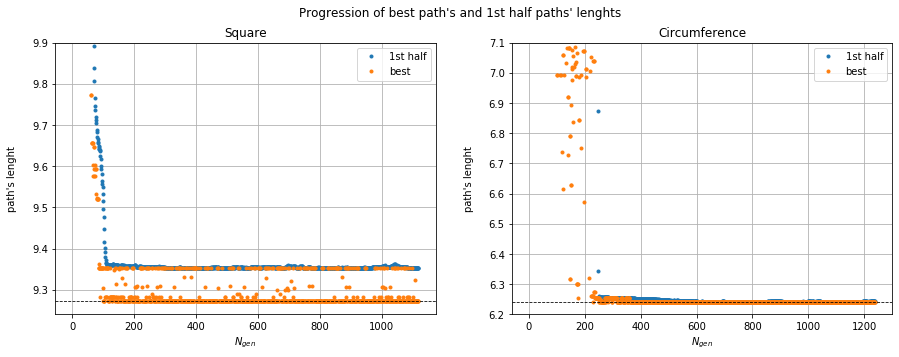

best total distance:
  square: 	 9.27331   with 100 generations
  circ: 	 6.2403   with 228 generations


In [17]:
for i in range(2): prog[i]=np.genfromtxt('results/path.'+loc[i]+'.32.lenght',names='gen,best,mean')

evolution(((9.24,9.9),(6.2,7.1)))

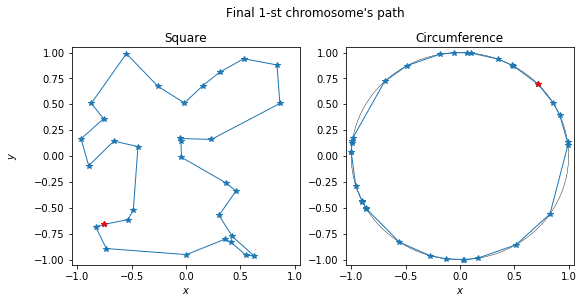

Final total distance:
  square: 	 9.27331
  circ: 	 6.2403


In [11]:
for i in range(2):
    dist[i]=np.genfromtxt('results/path.'+loc[i]+'.32.best',max_rows=1)
    path[i]=np.genfromtxt('results/path.'+loc[i]+'.32.best',skip_header=1,names='x,y')

path_fig(False)

### Appendice

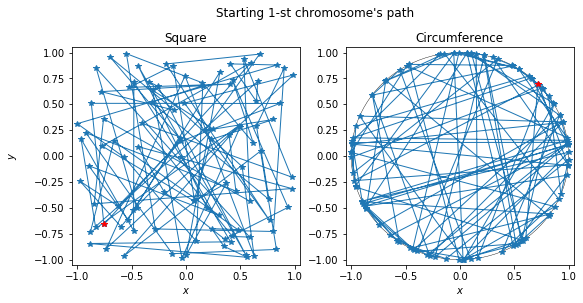

Starting total distance:
  square: 	 107.912
  circ: 	 121.07


In [12]:
for i in range(2):
    dist[i]=np.genfromtxt('results/cities.'+loc[i]+'.100.start',max_rows=1)
    path[i]=np.genfromtxt('results/cities.'+loc[i]+'.100.start',skip_header=1,names='x,y')

path_fig(True)

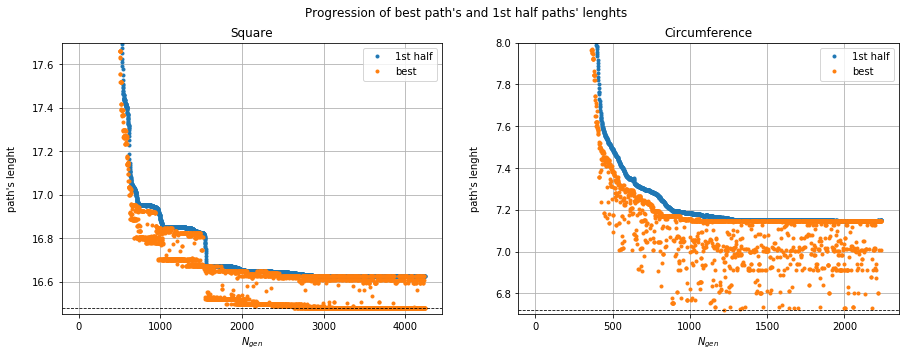

best total distance:
  square: 	 16.4776   with 3221 generations
  circ: 	 6.72088   with 1222 generations


In [18]:
for i in range(2): prog[i]=np.genfromtxt('results/path.'+loc[i]+'.100.lenght',names='gen,best,mean')

evolution(((16.45,17.7),(6.7,8)))

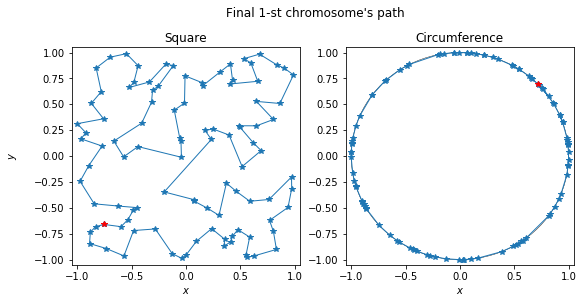

Final total distance:
  square: 	 16.4776
  circ: 	 6.72088


In [14]:
for i in range(2):
    dist[i]=np.genfromtxt('results/path.'+loc[i]+'.100.best',max_rows=1)
    path[i]=np.genfromtxt('results/path.'+loc[i]+'.100.best',skip_header=1,names='x,y')

path_fig(False)